In [1]:
#Use CPU
# %env CUDA_DEVICE_ORDER=PCI_BUS_ID #remove if TF-CPU
# %env CUDA_VISIBLE_DEVICES=-1 #remove if TF-CPU

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import hashlib
import itertools
from rdkit import Chem

In [3]:
from aizynthfinder import AiZynthFinder

Using TensorFlow backend.


In [4]:
finder = AiZynthFinder()

In [5]:
finder.load_stock("test_stock")

Loading Stockfile: /projects/mai/synthesisplanning/data/stocks/Enamine_BBstock_all.h5


In [6]:
policy_files =  ( #Path to policy model file as .hdf,
                #Path to template library file as .hdf)
finder.policy_files = policy_files
finder.load_policy()
finder.policy.use_prior = True
finder.policy.cutoff_cumulative = 0.995
finder.policy.cutoff_number = 50 #number of templates to examine 
finder.time_limit = 120 #in seconds

Loading Policy: /projects/mai/knwb390_thakkar/synthesis_planning/fulldata_03_05_19_rdchiral/rehashed_models/full_uspto_03_05_19_fp2048m3s0/checkpoints/weights.hdf5
Loading Templates: /projects/mai/knwb390_thakkar/synthesis_planning/fulldata_03_05_19_rdchiral/rehashed_data/usptofp2048m3s0/full_uspto_03_05_19_rdchiral_template_library.csv.hdf


Defining tree root: Cc1cccc(C)c1N(CC(=O)Nc1ccc(-c2ncon2)cc1)C(=O)C1CCS(=O)(=O)CC1
Starting search
................................................................................ 
....................Search completed
Analyzing_routes
Best Score 0.97
---SMILES---
CC1=C(C(=CC=C1)C)N(CC(=O)NC2=CC=C(C=C2)C3=NOC=N3)C(=O)C4CCS(=O)(=O)CC4

---Compounds to Purchase---


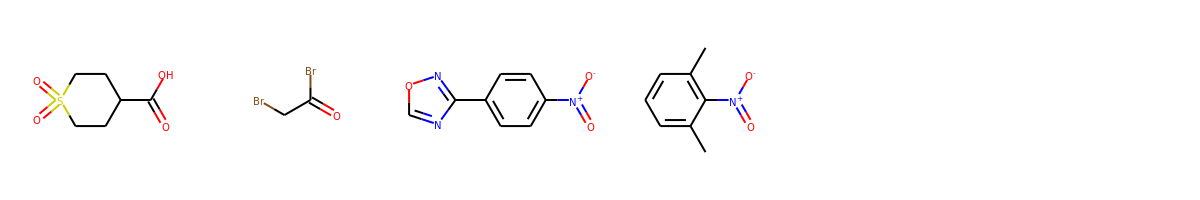

---Route---
([NH2;D1;+0:1]-[c:2])>>(O=[N+;H0;D3:1](-[O-])-[c:2])
Cc1cccc(C)c1[N+](=O)[O-]>>Cc1cccc(C)c1N

([NH2;D1;+0:1]-[c:2])>>(O=[N+;H0;D3:1](-[O-])-[c:2])
O=[N+]([O-])c1ccc(-c2ncon2)cc1>>Nc1ccc(-c2ncon2)cc1

([C:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[NH;D2;+0:4]-[c:5])>>(Br-[C;H0;D3;+0:1](-[C:2])=[O;D1;H0:3]).([NH2;D1;+0:4]-[c:5])
Nc1ccc(-c2ncon2)cc1.O=C(Br)CBr>>O=C(CBr)Nc1ccc(-c2ncon2)cc1

([#7:3]-[C:2](=[O;D1;H0:4])-[CH2;D2;+0:1]-[NH;D2;+0:5]-[c:6])>>(Br-[CH2;D2;+0:1]-[C:2](-[#7:3])=[O;D1;H0:4]).([NH2;D1;+0:5]-[c:6])
Cc1cccc(C)c1N.O=C(CBr)Nc1ccc(-c2ncon2)cc1>>Cc1cccc(C)c1NCC(=O)Nc1ccc(-c2ncon2)cc1

([C:4]-[N;H0;D3;+0:5](-[c:6])-[C;H0;D3;+0:1](-[C:2])=[O;D1;H0:3])>>(O-[C;H0;D3;+0:1](-[C:2])=[O;D1;H0:3]).([C:4]-[NH;D2;+0:5]-[c:6])
Cc1cccc(C)c1NCC(=O)Nc1ccc(-c2ncon2)cc1.O=C(O)C1CCS(=O)(=O)CC1>>Cc1cccc(C)c1N(CC(=O)Nc1ccc(-c2ncon2)cc1)C(=O)C1CCS(=O)(=O)CC1


---Time to Solved---
24.525826454162598

---Solved---
Unsolved

---Number of Steps---
5



In [7]:
n = 100 #max 100
 
smiles = 'CC1=C(C(=CC=C1)C)N(CC(=O)NC2=CC=C(C=C2)C3=NOC=N3)C(=O)C4CCS(=O)(=O)CC4' #Amenamevir
finder.target_smiles = smiles
finder.prepare_tree()
result = finder.tree_search(stop_when_solved=False)
route = finder.extract_route()
steps = len(route[0])
result.append(steps)
print('---SMILES---')
print(str(smiles + '\n'))
print('---Compounds to Purchase---')
route[1][0].state.display()
print('---Route---')
print(finder.route_to_text(route) + '\n')
print('---Time to Solved---')
print(str(result[0]) + '\n')
print('---Solved---')
if result[1] == 1:
    print('Solved' + '\n')
else:
    print('Unsolved' + '\n')
print('---Number of Steps---')
print(str(result[-1]) + '\n')

'Route Score: 0.975'

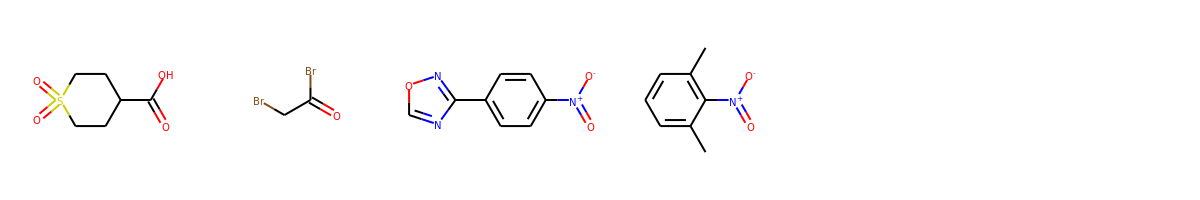

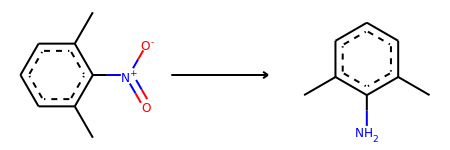

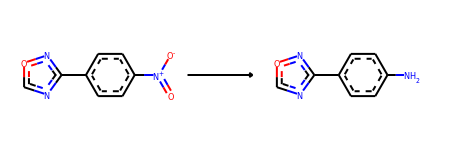

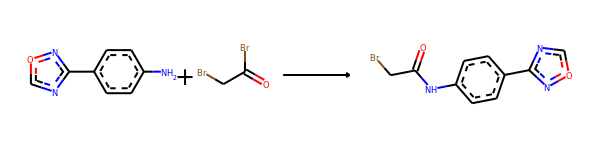

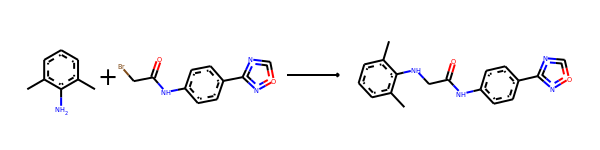

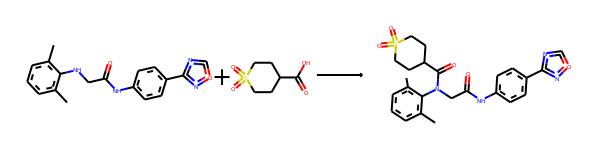

In [8]:
finder.display_route(route)